# Исследование объявлений о продаже квартир

На вход предоставляются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

***Цель проекта:***  
Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

***Этапы работы:***
- проведен исследовательский анализ и предобработка данных для датасета с объявлениями о продаже квартир в Санкт-Петербурге,
- выявлены, влияние площади, потолков, количества комнат, даты объявления на цены квартир всех представленных населённых пунктов и центра Санкт-Петербурга для построения автоматизированной системы определения цен во избежание мошенничества и аномалий.
- на основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от
удаленности от центра,
- проведена предобработка данных,
- добавлены новые данные.

***Описание данных***  
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
•	balcony — число балконов  
•	ceiling_height — высота потолков (м)  
•	cityCenters_nearest — расстояние до центра города (м)  
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
•	first_day_exposition — дата публикации  
•	floor — этаж  
•	floors_total — всего этажей в доме  
•	is_apartment — апартаменты (булев тип)  
•	kitchen_area — площадь кухни в квадратных метрах (м²)  
•	last_price — цена на момент снятия с публикации  
•	living_area — жилая площадь в квадратных метрах(м²)  
•	locality_name — название населённого пункта  
•	open_plan — свободная планировка (булев тип)  
•	parks_around3000 — число парков в радиусе 3 км  
•	parks_nearest — расстояние до ближайшего парка (м)  
•	ponds_around3000 — число водоёмов в радиусе 3 км  
•	ponds_nearest — расстояние до ближайшего водоёма (м)  
•	rooms — число комнат  
•	studio — квартира-студия (булев тип)  
•	total_area — площадь квартиры в квадратных метрах (м²)  
•	total_images — число фотографий квартиры в объявлении

**ПЛАН РАБОТЫ:**
1. [Открытие данных](#1)
2. [Предобработка данных](#2)
3. [Добавление в таблицу](#3)
4. [Исследовательский анализ данных](#4)
3. [Общий вывод](#5)

<a id="1"></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv')



In [2]:
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Вот и первая проблема. Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv.

In [3]:
#Разделим данные с помощью знака табуляции '\t'
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
#Оценим объём данных в таблице и есть ли NAN-ы.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

***Вывод***

***Пропуски:***  
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
•	balcony — число балконов  
•	ceiling_height — высота потолков (м)  
•	cityCenters_nearest — расстояние до центра города (м)  
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
•	floors_total — всего этажей в доме  
•	is_apartment — апартаменты (булев тип)  
•	kitchen_area — площадь кухни в квадратных метрах (м²)  
•	living_area — жилая площадь в квадратных метрах(м²)  
•	locality_name — название населённого пункта  
•	parks_around3000 — число парков в радиусе 3 км  
•	parks_nearest — расстояние до ближайшего парка (м)  
•	ponds_around3000 — число водоёмов в радиусе 3 км  
•	ponds_nearest — расстояние до ближайшего водоёма (м)

***Тип данных: столбец - нужный тип***  
•	last_price - int64   
•	first_day_exposition - datetime
•   floors_total - int  
•	is_apartment - bool  
•	parks_around3000 - int  
•	ponds_around3000 - int  
 


<a id="2"></a>
### Шаг 2. Предобработка данных

#### Обработка пропусков

Итак, нужно что-то делать с пропущенными значениями!<br/>Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену.
Пропуски в столбцах, которые нам не пригодятся в дальнейшем для решения поставленных задач, правильно оставить:  
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
•	is_apartment — апартаменты (булев тип)  
•	parks_around3000 — число парков в радиусе 3 км  
•	parks_nearest — расстояние до ближайшего парка (м)  
•	ponds_around3000 — число водоёмов в радиусе 3 км  
•	ponds_nearest — расстояние до ближайшего водоёма (м)

 И оставим пропуски в стоблце 'days_exposition', т.к. здесь начичие пропусков может быть связано с тем, что объявление еще не снято.

Отсутствие значения — тоже важный сигнал, который не нужно прятать.
Заполним пропуски, где это уместно.


In [6]:
part_nan=df.isna().mean().sort_values(ascending=True)
print('Доля пропусков в столбцах:')
part_nan.map('{:.2%}'.format)


Доля пропусков в столбцах:


total_images             0.00%
open_plan                0.00%
floor                    0.00%
rooms                    0.00%
studio                   0.00%
total_area               0.00%
last_price               0.00%
first_day_exposition     0.00%
locality_name            0.21%
floors_total             0.36%
living_area              8.03%
kitchen_area             9.61%
days_exposition         13.42%
ponds_around3000        23.28%
parks_around3000        23.28%
cityCenters_nearest     23.29%
airports_nearest        23.38%
ceiling_height          38.80%
balcony                 48.61%
ponds_nearest           61.56%
parks_nearest           65.91%
is_apartment            88.29%
dtype: object

 ##### Пропуски в столбце 'balcony'(число балконов)

In [7]:
#сделаем замену пропусков на ноль
df['balcony'] = df['balcony'].fillna(0)
# df.info() проверка

 ##### Пропуски в столбцах 'floors_total' (всего этажей в доме) и  'locality_name'(название населённого пункта)

Пропуски в столбцах 'floors_total' и  'locality_name' равны 0,4 % и 0.2 % соответственно. Т.к. доля пропусков совсем маленькая и тем более данные этих столбцов не будут использоваться при дальнейшем анализе -удалим их.

In [8]:
#Удаляем строки с пропусками в 2 данных столбцах
df.dropna(subset = ['floors_total', 'locality_name'], inplace = True)
# df.info() проверка

##### Пропуски в столбце 'ceiling_height'(высота потолков)

In [9]:
#Посмотрим какие вообще у нас потолки:
unik_ceiling_height=df['ceiling_height'].unique()
unik_ceiling_height.sort()
print(unik_ceiling_height)



[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

Наблюдаем:
1. Высота потолков варьируется от 1 до 100 метров.
2. Очень много пропусков - почти 40%.

Наши действия:  
Приведем в порядок значения.  
Насколько нам известно, стандартная высота потолков - 2.7 м и вряд ли кому нужны потолки с высотой 27 м, не говоря уже и о 100 м. Скорее всего ошиблись с "запятой" при ручном внесении данных.
Из [источника](https://www.google.com/search?q=%D0%BA%D0%B0%D0%BA%D0%B8%D0%B5+%D0%B1%D1%8B%D0%B2%D0%B0%D1%8E%D1%82+%D0%BF%D0%BE%D1%82%D0%BE%D0%BB%D0%BA%D0%B8+%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D0%BC%D0%B8+%D0%B2+%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%B5&oq=%D0%BA%D0%B0%D0%BA%D0%B8%D0%B5+%D0%B1%D1%8B%D0%B2%D0%B0%D1%8E%D1%82+%D0%BF%D0%BE%D1%82%D0%BE%D0%BB%D0%BA%D0%B8+%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D0%BC%D0%B8+%D0%B2+&aqs=chrome.1.69i57j33i22i29i30l7.15533j0j15&sourceid=chrome&ie=UTF-8)
узнали, что высота потолков в квартирах бывает от 2, 5 до 5 метров.  
Нам теперь необходимо сделать высоту потолков от 2, 5 до 5 метров. 

Для этого:  
- оставим все значения от 2,5 до 5 метров.  
- остальные значения и пропуски заполним медианой значений.

In [10]:
#вычисляем значение медиану столбца 'ceiling_height'
height_median = df['ceiling_height'].median()
print('Высота потолка (медиана):',height_median)


Высота потолка (медиана): 2.65


In [11]:
#начнем процесс замены данных
# вводим функцию, которая на вход принимает значение высоты потолка
def ceiling_height(metr):
    if metr>2.5 or metr<5 or metr=='':
        return height_median
#print(df['ceiling_height'].unique()) проверка
# df.info()     
        
        

Text(0.5, 1.0, 'ceiling_height')

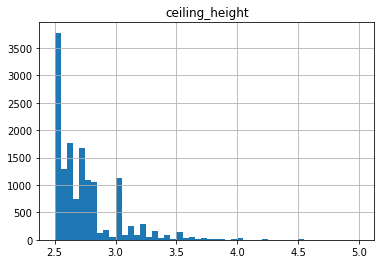

In [12]:
#строим график
import pandas as pd
import matplotlib.pyplot as plt
_=df['ceiling_height'].hist(bins=50, range=(2.5, 5))
plt.title('ceiling_height')

***Вывод:*** 
В основном, всё по стандарту, т.е. большая часть потолков - от 2.5 до 2.7 метров

##### Пропуски в столбце 'living_area'(жилая площадь в квадратных метрах) и 'kitchen_area' (площадь кухни в квадратных метрах)

In [13]:
#Посчитаем какую часть занимает жилая площадь от всей площади квартиры
part_living_area = round((df['living_area'] / df['total_area']).mean(),3)
print("Площадь жилого помещения занимает: {:.1%}".format(part_living_area))
#Посчитаем какую часть занимает площадь кухни от всей площади
part_kitchen_area = round((df['kitchen_area'] / df['total_area']).mean(),3)
print("Площадь кухни занимает: {:.1%}".format(part_kitchen_area))


Площадь жилого помещения занимает: 56.5%
Площадь кухни занимает: 18.7%


In [14]:
#сделаем замену пропусков произведением общей площади на часть, которую занимают жилая площадь и кухня
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.565)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.187)


##### Пропуски в столбце 'cityCenters_nearest '(расстояние до центра города)

Расстояние до центра города: пропущено 23,3% значений. А это не мало...Удалить их будет неправильно!  


In [15]:
# необходимо сделать группировку по локации (названию нас.пункта, кроме СПб) и выделить среднее значение 
# расстояния до центра города  для каждой локации 
#и вставить эти значения вместо нулей по этим локациям
#вводим переменную, которая нам дает среднее значение  

median_locality_name = df.groupby(['locality_name'])['cityCenters_nearest'].median()
#задаем функцию, которая на вход принимает строковое значение
def locality_name_de(row):
    locality_name = row['locality_name'] 
    cityCenters_nearest = row['cityCenters_nearest']
#мы в этой строчке проверяем, что значение является пропуском, город не СПб и значение по этой локации уже встречалось:
    if pd.isna(cityCenters_nearest) and row['cityCenters_nearest']!='Санкт-Петербург' and row['locality_name']!='':
        row['cityCenters_nearest'] = median_locality_name.loc[locality_name]
    return row
#последовательно применяем функцию к каждой строке df отдельно
df = df.apply(locality_name_de, axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18133 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

Заполнили всего 68 пропусков...Мало! Остальные пропуски придется оставить как есть.

#### Замена типа данных

In [16]:
#изменим тип данных на datetime 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Добавим день недели, месяц и год -это пригодится нам дальше
df['week_day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['first_day_exposition'] = df['first_day_exposition'].dt.date

In [17]:
#изменим тип данных столбцов с типа "float" на "int" только тех столбцов, где нет пропусков.
# применим способ через loc., сокращенную запись
df[['floors_total', 'last_price']] = df[['floors_total', 'last_price']].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18133 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000   

***ВЫВОД:***  
Для замены типа данных был использован метод 'astype', т.к. надо было тип указать 'int'. Метод to_numeric() используется для преобразования в тип 'float'. Данный метод использован к "чистым" столбцам, т.е. где нет пропусков, т.е. где это возможно на данный момент.Также изменили тип данных на datetime столбца 'first_day_exposition'  


<a id="3"></a>
### Шаг 3. Посчитайте и добавьте в таблицу

#### Цена квадратного метра

In [18]:
#высчитаем путем деления цены квартиры на её общую площадь, округлим до 2 знаков после запятой
df['metr_price'] = round(df['last_price'] / df['total_area'], 2)
#df.head()

#### День недели, месяц и год публикации объявления

In [19]:
# заменим тип данных по дате публикации со строчного на datetime
df['data_public'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#df.head()

#### Этаж квартиры (первый, последний, другой)

In [20]:
#введем функцию для определения этажа квартиры
def floor(df):
    if df['floor'] == 1:
        return 'первый'
    if df['floor'] == df['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
df['floors_group'] = df.apply(floor, axis=1)
#df.head()

#### Cоотношение жилой и общей площади, а также отношение площади кухни к общей.

In [21]:
#Посчитаем какую часть занимает площадь жилой площади от всей площади
df['part_living_area'] = round((df['living_area'] / df['total_area']).mean(),3)
df['part_kitchen_area'] = round((df['kitchen_area'] / df['total_area']).mean(),3)

In [22]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,week_day,month,year,metr_price,data_public,floors_group,part_living_area,part_kitchen_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000,8,NaN,...,755.0,NaN,3,3,2019,120370.37,2019-03-07,другой,0.565,0.187
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600,1,NaN,...,NaN,81.0,1,12,2018,82920.79,2018-12-04,первый,0.565,0.187
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300,4,NaN,...,574.0,558.0,3,8,2015,92785.71,2015-08-20,другой,0.565,0.187
3,0,64900000,159.0,2015-07-24,3,NaN,14,89.835,9,NaN,...,234.0,424.0,4,7,2015,408176.10,2015-07-24,другой,0.565,0.187
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000,13,NaN,...,48.0,121.0,1,6,2018,100000.00,2018-06-19,другой,0.565,0.187


***Вывод***  
Расширили границы нашей таблицы, все нужные столбцы добавлены.

<a id="4"></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Исследование площади, цены, числа комнат, высоты потолков

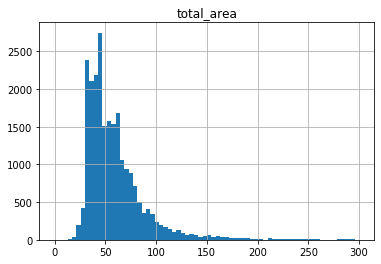

In [23]:
#Гистограмма площади квартиры
_=df.hist('total_area', bins=70,range = (0, 300))
#print(df['total_area'].unique())


Самый большой пик приходится примерно на 45, почти половину значений занимает площадь квартир до 50 квадратов, самые частые значения это примерно от 30 до 60 , очень мало значений после 150, но отдельные выбросы есть и после 200.

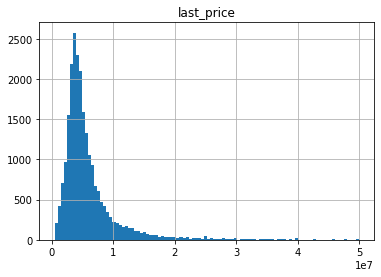

In [24]:
#Гистограмма цены квартиры
_= df.hist('last_price', bins=100,range = (500000, 50000000))


Самый большой пик приходится примерно на область около 3 млн, почти половину значений занимает цена до 5 млн, очень мало значений после 15 млн, но и есть значения после 20 млн (до 763 млн).

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

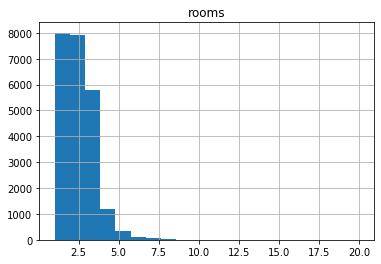

In [25]:
#Гистограмма для столбца 'rooms'
_=df.hist('rooms',bins=20, range = (1,20))
df['rooms'].unique()




Больше всего однокомнатных квартир, немного отстают по кол-ву двукомнатные. Очень мало квартир с кол-вом комнат более 5. есть отдельные выбросы и после значения 10. Есть и квартиры с 19-ью комнатами.  
Избавились от редких значений.


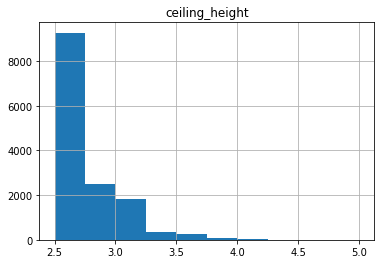

In [26]:
#Гистограмма для столбца 'ceiling_height'
_ = df.hist('ceiling_height', bins=10,range = (2.5,5))


Самое большое кол-во квартир со стандартными потолками в районе 2,7 метров -эти значения занимают больше половины всех значений. Потолки от 3,5 м встречаются уже реже.

#### Исследование количества времени для продажи квартиры

(0, 500)

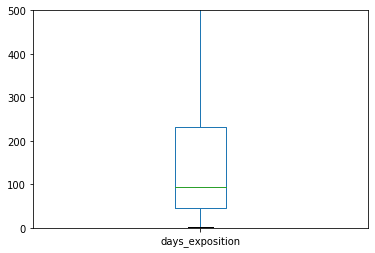

In [27]:
#построим диаграмму размаха для 'days_exposition' методом boxplot()
import matplotlib.pyplot as plt
df['days_exposition'].plot(kind = 'box')
plt.ylim(0, 500)


In [28]:
#методом describe() получим характерные значения, дающие представление о выборке столбца
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

***Вывод:***  

Четверть квартир продают за 45 дней - довольно-таки быстро, а есть и дольше, 230 дней - а это уже больше полугода (долго).  
В среднем люди продают квартиру за 95 дней. 

#### Анализ редких и выбивающихся значений

Проанализировали графики и заметили редкие и выбивающиеся значения (определили визуально):  
1. Площадь квартиры: до 30 и от 200.  
2. Цена квартиры: до 500 тыс и от 20 млн.  
3. Число комнат: от 7 комнат.
4. Дни продажи: от 425
Значения потолков мы уже "выравнили" в пункте обработка пропусков.


Избавимся от данных ненужные значений и построим "хороший" график.

,last_price,total_area,rooms,days_exposition
last_price,1.000000,0.759610,0.481062,0.075283
total_area,0.759610,1.000000,0.788786,0.115570
rooms,0.481062,0.788786,1.000000,0.088767
days_exposition,0.075283,0.115570,0.088767,1.000000


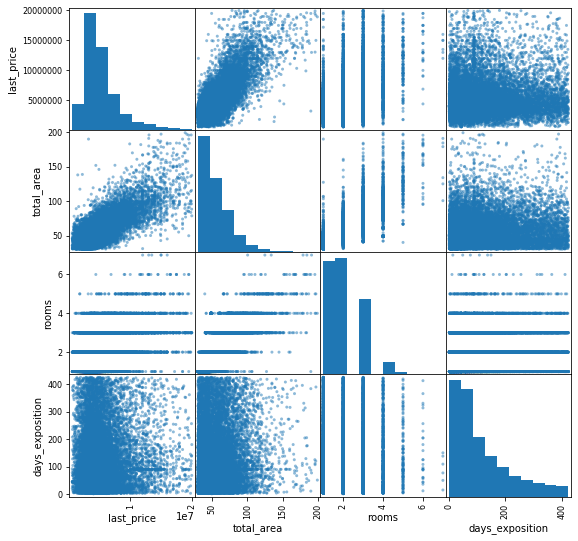

In [29]:
df_good = df.query('30<total_area<200')
df_good = df_good.query('1<=rooms <=7')
df_good = df_good.query('500000<last_price<20000000')
df_good = df_good.query('days_exposition<425')

df_good_multi = df_good.loc[:, ['last_price','total_area', 'rooms','days_exposition']]
display(df_good_multi.corr())
_=pd.plotting.scatter_matrix(df_good_multi, figsize=(9, 9)) 


In [30]:
#Проверка зависимости площади от длительности продажи
# df_pivot_area_day = df_good.pivot_table(index='days_exposition', values ='total_area', aggfunc='median')
# df_pivot_area_day.plot(style='o-', xlim=(0, 400))
# print(df_pivot_area_day)

Из графиков выше видно:  
1. Больше продано квартир с низкой стоимостью и маленькой площадью.  
2. Стоимость высокая у квартир с 6 и 7 комнатами и их очень мало. В основном, это квартиры с меньшим количеством комнат.  
3. Цена квартиры имеет малое влияние на длительность её продажи.  
4. Чем больше квартира, тем выше стоимость.  
5. Чем больше площадь, тем больше комнат в квартире.
6. Длительность продажи не зависит от площади квартиры.

#### Исследование факторов, влияющих на стоимость квартиры

,metr_price,last_price,total_area,rooms,cityCenters_nearest
metr_price,1.000000,0.652929,0.053715,-0.138592,-0.391240
last_price,0.652929,1.000000,0.759610,0.481062,-0.355366
total_area,0.053715,0.759610,1.000000,0.788786,-0.192783
rooms,-0.138592,0.481062,0.788786,1.000000,-0.135144
cityCenters_nearest,-0.391240,-0.355366,-0.192783,-0.135144,1.000000


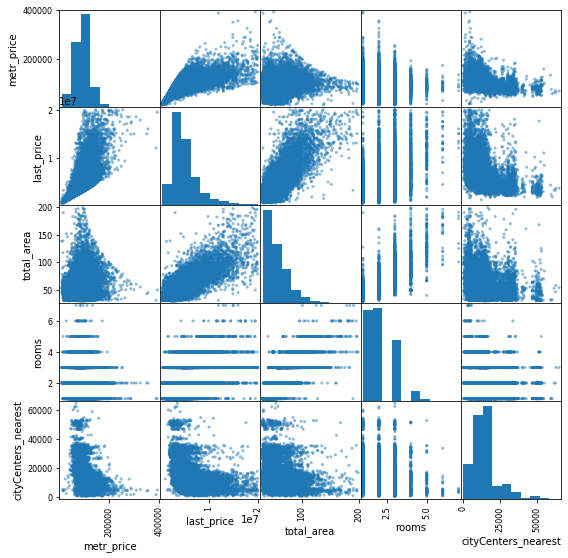

In [31]:
df_stat_multi = df_good.loc[:, ['metr_price','last_price','total_area','rooms','cityCenters_nearest']]
display(df_stat_multi.corr())
_=pd.plotting.scatter_matrix(df_stat_multi, figsize=(9, 9)) 

Из графиков выше видно:  
1. Высокие цены за квартиры находятся только в области ближе к центру города.
2. Цена за квадратный метр становится ниже с увеличением числа комнат.
3. Чем больше площадь, тем меньше стоимость квадратного метра.
4. Чем больше цена за квадратный метр, тем больше стоимость квартиры.


#####  Зависимость цены за квадратный метр от этажа.

,metr_price
floors_group,
другой,96055.16
первый,79550.56
последний,86315.79


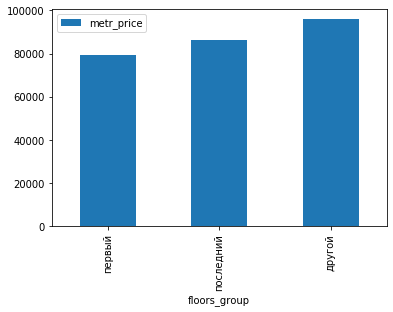

In [32]:
#создадим сводную таблицу для нагладности зависимости этажности от цены в медианном значении
df_pivot_floors_group = df_good.pivot_table(index='floors_group', values='metr_price', aggfunc='median')
# построим график этой зависимости
df_pivot_floors_group.sort_values(by = 'metr_price').plot(y='metr_price', kind ='bar')
df_pivot_floors_group

In [33]:
# Сделаем график по логике, т.е. чтобы было так:

In [34]:
d = {'первый': 0, 'другой': 1, 'последний': 2}

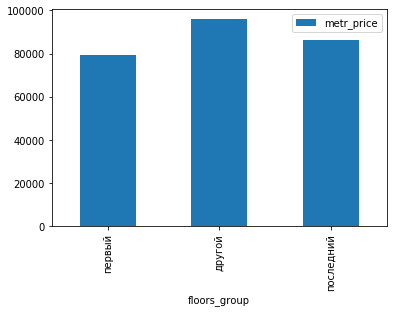

In [35]:
df_pivot_floors_group\
    .reset_index()\
    .assign(sort = lambda row: row['floors_group'].map(d))\
    .sort_values(by = 'sort')\
    .set_index('floors_group')\
    .plot(y='metr_price', kind ='bar')

***Вывод:***  
Самый низкий ценник у квартир на первом этаже, где всегда шумно и становится грязно от потока людей,  
а за ними следуют квартиры последних этажей, где холоднее и есть риск протечки крыши/кровли дома.  
Подороже квартиры между первым и последним этажами. Всё предсказуемо тут)

#####  Зависимость цены за квадратный метр от даты размещения: дня недели, месяца и года

          metr_price
week_day            
0           92970.06
1           93198.99
2           93857.14
3           93181.82
4           92500.00
5           92356.69
6           91666.67


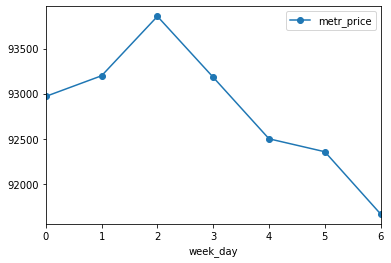

In [36]:
# создадим сводную таблицу для нагладности зависимости размещения объявления (день недели) от цены в медианном значении
df_pivot_week_day=df_good.pivot_table(index='week_day', values='metr_price', aggfunc='median')
#df_pivot_week_day.plot(y='metr_price', style ='o') - так не нравится
df_pivot_week_day.plot(y='metr_price', style ='o-')
print(df_pivot_week_day)

       metr_price
month            
1       93303.830
2       92957.750
3       93750.000
4       91935.480
5       91463.410
6       90540.540
7       93250.025
8       95000.000
9       94444.440
10      93125.000
11      93434.725
12      90738.595


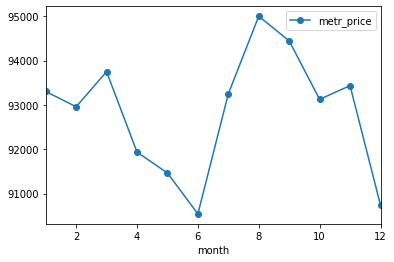

In [37]:
# создадим сводную таблицу для нагладности зависимости размещения объявления (месяца) от цены в медианном значении
df_pivot_month = df_good.pivot_table(index='month', values ='metr_price', aggfunc='median')
df_pivot_month.plot(y='metr_price', style ='o-')
print(df_pivot_month)

      metr_price
year            
2015   89543.560
2016   90425.530
2017   90816.330
2018   94579.905
2019  102142.855


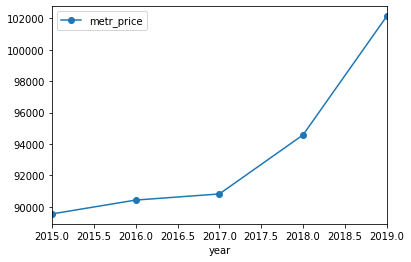

In [38]:
# создадим сводную таблицу для нагладности зависимости размещения объявления (год) от цены в медианном значении
df_pivot_year = df_good.pivot_table(index='year', values ='metr_price', aggfunc='median')
df_pivot_year.plot(y='metr_price', style ='o-')
print(df_pivot_year)

***Вывод:***  
1. По дням недели:  
    цена за кв.метр в объявлениях, которые разместили во вторник или среду, примерно на 1000 руб дороже, чем в другие дни.
    
   
2. По месяцам:  
    Квартиры дешевеют к лету и дорожают к осени.
    
    
3. По годам:  
    Самые дорогие квартиры были в 2014 году, с 2015 года квартиры упали в цене и с 2017 года наблюдается постепенное увеличение  
    цен.
    
    


####  Анализ десяти населённых пунктов с наибольшим числом объявлений

In [39]:
#сделаем сводную таблицу зависимости цены кв.метра от локации по кол-ву продаж
df_pivot_locality_name = df_good.pivot_table(index='locality_name', values ='metr_price', aggfunc='count')
df_pivot_locality_name = df_pivot_locality_name.sort_values(by = 'metr_price', ascending = False)
#выыедем 11 первых. т.к. первую строчку занимает СПб
df_pivot_locality_name.head(11)

,metr_price
locality_name,
Санкт-Петербург,11117
посёлок Мурино,410
посёлок Шушары,354
Всеволожск,287
Колпино,275
посёлок Парголово,265
Пушкин,255
деревня Кудрово,232
Гатчина,227


In [40]:
#создадим словарь с этими населенными пунктами
spisok_ten_city=df_pivot_locality_name.head(11).index.to_list()
df_ten_city = df_good.query('locality_name in @spisok_ten_city')
#перепишем data_pivot_locality_name
df_pivot_locality_name = df_ten_city.pivot_table(index='locality_name', 
                                                   values =['metr_price', 'cityCenters_nearest'], 
                                                   aggfunc='mean')
df_pivot_locality_name = df_pivot_locality_name.sort_values(by = 'metr_price', ascending = False)
print(df_pivot_locality_name)

                   cityCenters_nearest     metr_price
locality_name                                        
Санкт-Петербург           12052.824953  106424.327186
Пушкин                    28894.682353  100330.399765
деревня Кудрово                    NaN   92065.872198
посёлок Парголово         19953.528302   89023.974679
посёлок Мурино                     NaN   84776.100488
Петергоф                  35112.993151   82974.151712
посёлок Шушары            24113.296610   76806.432881
Колпино                   32070.083636   74201.432800
Гатчина                            NaN   67859.086916
Всеволожск                         NaN   66924.826934
Выборг                             NaN   56578.873158


***Вывод:***  
Самые дорогие квартиры в г.Пушкино из данного списка, не смотря на то, что город находится почти в 30 км от центра СПб, т.е. дальше чем п.Парголово и п. Шушары. Самые дешевые квартиры в Выборге.

####  Анализ изменения цены по степени удалённости от центра

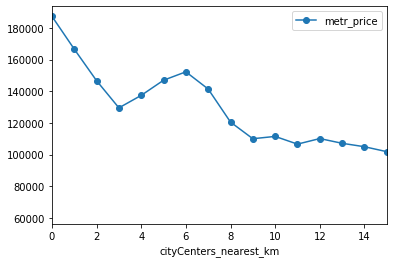

In [41]:
#переведем м в километры
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
#df['cityCenters_nearest_km'].min() - 0,181 км
#df['cityCenters_nearest_km'].max() - 65 км
#Заполним пропуски любой цифрой, которой у нас нет(например, 100)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(100)
# округим путем измены типа данных на int
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
#сделаем срез по локации СПб и исключим пропуски, которые заполнили нулями, постороим сводную зависимости цены от километража
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=100').pivot_table(index = 'cityCenters_nearest_km', values = 'metr_price', aggfunc = 'mean')
#построим график pivot_table_km.plot(style='o-', xlim=(0, 30))
#построим график этот же, но ближе
_=pivot_table_km.plot(style='o-', xlim=(0, 15))
#df['cityCenters_nearest_km'].describe()



***Вывод:***  

Из графика видно, что характер изменения цен на квартиры меняются примерно до 9 км, а далее цена очень медленно падает, то есть за центром цены практически одинаковые. Поэтому можно сделать вывод, что радиус центра равен примерно 9 км.


####  Сравнение выводов по квартирам в центре и общих выводов по всему городу

##### Анализ параметров: площадь, цена, число комнат, высота потолков.

In [42]:
#выберем из таблицы данные: город- Спб и расстояние от центра - 3 км.
center_spb = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 3')


,metr_price,total_area,rooms,ceiling_height
metr_price,1.000000,0.053715,-0.138592,0.067771
total_area,0.053715,1.000000,0.788786,0.106478
rooms,-0.138592,0.788786,1.000000,0.044166
ceiling_height,0.067771,0.106478,0.044166,1.000000


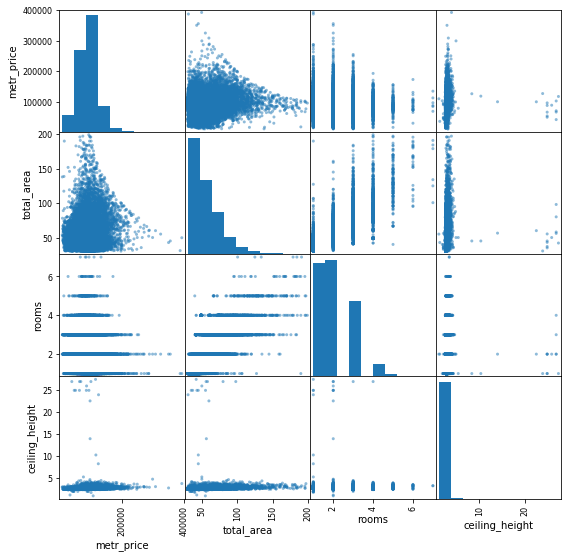

In [43]:
center_spb_stat1=df_good.loc[:, ['metr_price','total_area','rooms','ceiling_height']]
display(center_spb_stat1.corr())
_=pd.plotting.scatter_matrix(center_spb_stat1, figsize=(9, 9)) 

***Вывод:***  
1. С увеличением площади, увеличиваетя число комнат и уменьшается цена за кв.метр.  
2. Чем больше комнат, тем больше площадь и меньше цена за кв.метр.  
3. Чем выше потолки, тем больше площадь и меньше цена за кв.метр.

##### Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

###### Число комнат

0.2446490698785466

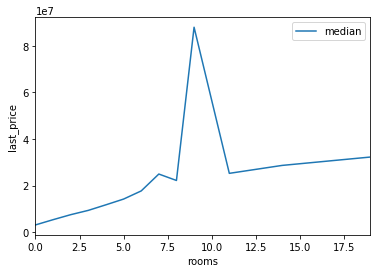

In [44]:
# построим сводную таблицу и график её
center_spb_rooms = center_spb.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
center_spb_rooms.columns = ['median']
center_spb_rooms.plot(y = 'median')
plt.ylabel('last_price')

center_spb_rooms.sort_values('median', ascending = False)

center_spb['rooms'].corr(center_spb['last_price'])
#посмотрим сколько уник значений по кол-ву комнат
#center_spb['rooms'].value_counts()

0.2446490698785466

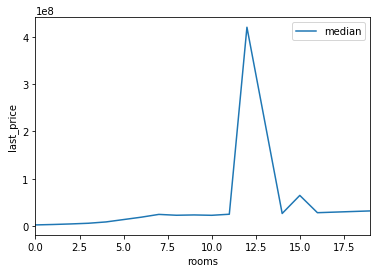

In [45]:
#Посмотрим как обстоят дела с этим вопросом в общей таблице
df_rooms= df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
df_rooms.columns = ['median']
df_rooms.plot(y = 'median')
plt.ylabel('last_price')

df_rooms.sort_values('median', ascending = False)

df['rooms'].corr(center_spb['last_price'])

In [46]:
#посмотрим кол-во уник значений в общей выборке
#df['rooms'].value_counts().sort_values(ascending=False)

***Вывод:*** 
Судя по зависимости медианной стоимости от кол-ва комнат наблюдаем:  
1. В центре: цена растет плавно до кол-ва 7 комнат, затем понижение (значение- 8 комнат), и далее медленно повышается цена, если не учитывать выбивающуюся из ряда одну дорогую 9-комнатную квартиру.
2. В общей выборке: Можно было бы повышение цены посчитать медленным, даже почти плавным, если бы не дорогущая одна 12-комнатная и одна 15-комнатная квартиры.


###### Этаж

              metr_price
floors_group            
другой         119148.94
первый         107508.77
последний      114432.50


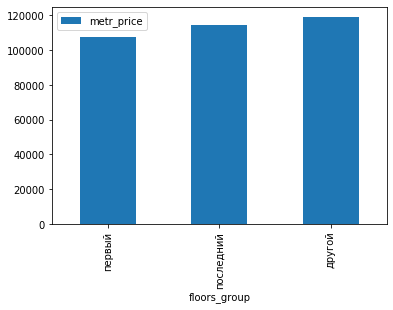

In [47]:
center_spb_floors_group = center_spb.pivot_table(index='floors_group', values='metr_price', aggfunc='median')
# построим график этой зависимости
center_spb_floors_group.sort_values(by='metr_price').plot(y='metr_price', kind ='bar')
print(center_spb_floors_group)

***Вывод:***  
Самый низкий ценник у квартир на первом этаже, а за ними следуют квартиры последних этажей.  
Подороже квартиры между первым и последним этажами.  
Похожая ситуация и в общей выборке

###### Удалённость от центра

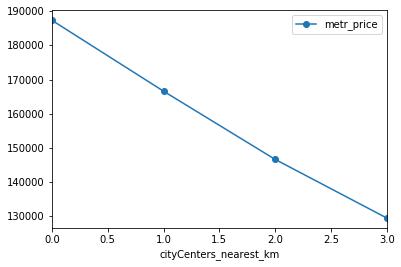

In [48]:
center_spb_km = center_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'metr_price', aggfunc = 'mean')
_=center_spb_km.plot(style='o-', xlim=(0, 3))


***Вывод:***  
Из графика видно, что стоимость квартир падает с ростом расстояния от центра. 

          metr_price
week_day            
0         121354.325
1         114104.915
2         114903.120
3         110132.160
4         118000.000
5         120568.085
6         110843.370


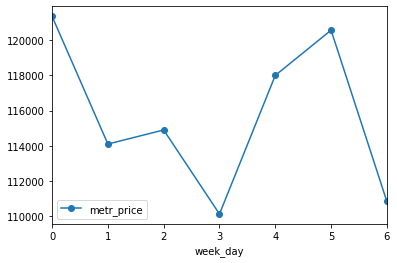

In [49]:
# создадим сводную таблицу для нагладности зависимости размещения объявления (день недели) от цены в медианном значении
center_spb_week_day=center_spb.pivot_table(index='week_day', values='metr_price', aggfunc='median')
center_spb_week_day.plot(y='metr_price', style='o-')
print(center_spb_week_day)

       metr_price
month            
1      117244.900
2      116406.250
3      117409.565
4      126484.910
5      107799.220
6      111469.125
7      112195.120
8      110491.565
9      116054.160
10     121978.410
11     112639.590
12     121568.630


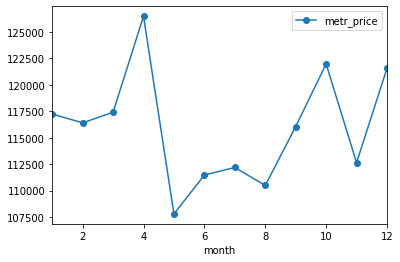

In [50]:
# создадим сводную таблицу для нагладности зависимости размещения объявления (месяца) от цены в медианном значении
center_spb_month = center_spb.pivot_table(index='month', values ='metr_price', aggfunc='median')
center_spb_month.plot(y='metr_price', style='o-')
print(center_spb_month)

      metr_price
year            
2014  260000.000
2015  107055.590
2016  109090.910
2017  114655.170
2018  117898.845
2019  132383.040


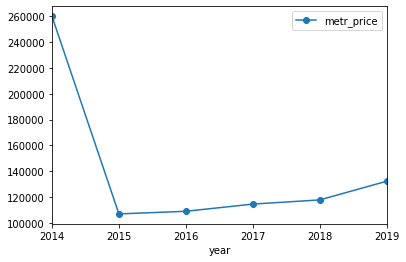

In [51]:
# создадим сводную таблицу для нагладности зависимости размещения объявления (год) от цены в медианном значении
center_spb_year = center_spb.pivot_table(index='year', values ='metr_price', aggfunc='median')
center_spb_year.plot(y='metr_price', style='o-')
print(center_spb_year)

***Вывод:***  
1. По дням недели:  
    цена за кв.метр в объявлениях, которые разместили в вскр и пн дороже, чем в другие дни.
    Отличается от общей: вт и ср были самые дорогие.
    
   
2. По месяцам:  
    Квартиры дешевеют к лету и начинают дорожать к осени.  
    Ситуация похожая с общей выборкой.
    
    
3. По годам:  
    в 2015 году произошел резкий спад стоимости квартир.И с 2017 года наблюдается постепенный рост.
    В общей выборке не было такого резкого спада цены в 2015 году, но характер такой же: понижение в 2015 году и постепенное увеличение стоимости квартир с каждым годом
    
 

<hr style="border: 2px solid orange;" />

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
def make_box_by_category(value=None, category=None, data=None, sort=False, sort_by=None, stat='median', title=''):
    """
    value: боксплоты для каких значений строить
    category: группирующая переменная
    data: данные
    sort: сортировка, False = ascending
    sort_by: по какому полю сортировать, возможный выбор value или category
    stat: расчетная статистика  - mean/median
    title: заголовок графика
    """
    #сортировка по stat
    tmp = \
        data\
        .groupby(category, as_index=False)\
        .agg({value:stat})\
        .sort_values(by=sort_by, ascending=sort).reset_index()

    plt.figure(figsize=(9,6))
    sns.boxplot(x=category, y= value, data=data, showfliers=False, order=tmp[category].to_list(), 
                showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},
               color='cyan')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

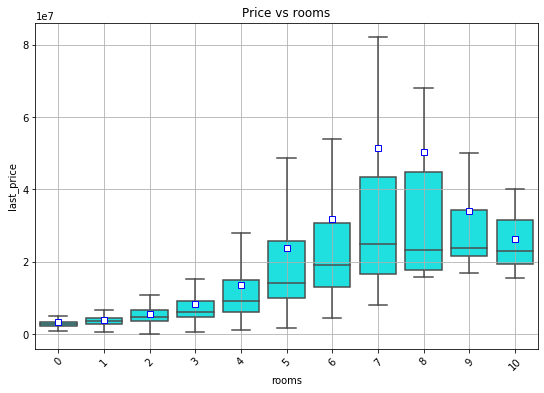

In [53]:
make_box_by_category(value='last_price', category='rooms', data=df.query("rooms <= 10"), sort=True, sort_by='rooms', stat='median',
                    title='Price vs rooms')

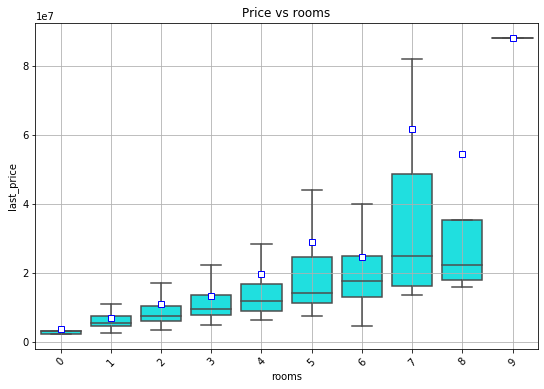

In [54]:
make_box_by_category(value='last_price', category='rooms', data=center_spb.query("rooms <= 10"), sort=True, sort_by='rooms', stat='median',
                    title='Price vs rooms')

***Вывод:***  
    В центре: Наблюдается повышение цены до кол-ва 5 комнат, затем понижение на 6 комнатах, повышение при 7 комнатах и далее цена падает.  
    Общая: Цена повышается до кол-ва 7 комнат, а далее квартиры дешевеют.

<a id="5"></a>
### Шаг 5. Общий вывод  

1. Мы изучили полученную информацию - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
2. Обработали данные:  
- заполнили пропущенные значения, где было это возможно и уместно;  
- заменили типы данных на необходимые.
3. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 
4. Провели исследовательский анализ данных:
- Исследование площади, цены, числа комнат, высоты потолков. 

Выяснили, что почти половину значений занимает площадь квартир до 50 квадратов. Избавились от редких значений до 30 кв.м и от 200 кв.м.  
Чаще всего люди могут себе позволить купить квартиру около 3 млн, половина приобретений -это квартиры до 5 млн, но есть и отдельные богатые клиенты, которые могут приобрести квартиру и за более, чем 500 млн. Избавились от значений цены от 20 млн. Исходя из стоимости, можно, догадаться, что чаще это однокомнатные и двукомнатные квартиры. Интервал комнат от 1 до 19 комнат. Тут от редких значений тоже избавились -квартиры от 8 комнат. При помощи диаграммы размаха, выявили, что четверть квартир продают за 45 дней - довольно-таки быстро, а есть и дольше, 420 дней - а это уже больше года (долго).Избавились от значений с 425 дней. В среднем люди продают квартиру за 95 дней.  
- Исследовали факторы, влияющие на стоимость квартиры.

Стоимость за кв.метр дешевле, если квартира на первом или последнем этаже, число комнат меньше 3, объявление размещено  в мае-июне, в 2015 году. Стоимость за кв.метр дороже если квартира в центре города, объявление размещено в августе.

Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. 
Изходя из наблюдений по резкости изменения стоимости квартир в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 9 километров. Так же по этому графику наблюдали, что стоимость не всегда уменьшается с увеличением расстояния от центра города. По этому поводу сделан анализ населенных пунктов с наибольщим числом объявлений: самые дорогие квартиры в г.Пушкино, не смотря на то, что город находится почти в 30 км от центра СПб, т.е. дальше чем п.Парголово и п. Шушары. Самые дешевые квартиры в Выборге из данного списка.
- Сравненили выводы по квартирам в центре и общих выводов по всему городу.  
 В центре: цена растет плавно до кол-ва 7 комнат, затем понижение (значение- 8 комнат), и далее медленно повышается цена, если не учитывать выбивающуюся из ряда одну дорогую 9-комнатную квартиру. В общей выборке: Можно было бы повышение цены посчитать медленным, даже почти плавным, если бы не дорогущая одна 12-комнатная и одна 15-комнатная квартиры. 
Остальные значения аналогичны или имеют незначительные отличия- например, ситуация с "этажами" идентична, по дням недели цена за кв.метр в объявлениях, которые разместили в вскр и пн дороже, чем в другие дни. Отличается от общей выборки: вт и ср были самые дорогие.
По СПБ- в 2015 году произошел резкий спад стоимости квартир и с 2017 года наблюдается постепенный рост. В общей выборке не было такого резкого спада цены в 2015 году, но характер такой же: понижение в 2015 году и постепенное увеличение стоимости квартир с каждым годом.

